Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 11**: Pinball scattering is a purely Newtonian equations of motion exercise without feedback or random numbers but showing chaotic behaviour regardless.

Consider the potential $$V(x,y)=x^{2}\,y^{2}\,e^{-\left(x^{2}+y^{2}\right)}$$ (all terms dimensionless) with four maxima centred at $x=\pm{}1$ and $y=\pm{}1$, respectively. It is defined as a repulsive potential for any test particle (the pinball) moving through that potential. The equations of motion to solve hence are $$\frac{d^{2}x(t)}{dt^{2}} = -2.0\,y^{2}\,x\,(1-x^{2})\,e^{-\left(x^{2}+y^{2}\right)}$$ and $$\frac{d^{2}y(t)}{dt^{2}} = -2.0\,x^{2}\,y\,(1-y^{2})\,e^{-\left(x^{2}+y^{2}\right)}.$$

**Task**: Solve these two coupled ODE's in stages: 

**(a)** write a function `trajectory(impactpar, speed)` which takes the impact parameter, $x(0)$, as input as well as the speed $v_{y}$ for initial conditions (impact parameter$=x(0)$, $v_{x}=\frac{dx(0)}{dt}$, $y(0)$ and $v_{y}=\frac{dy(0)}{dt}$ in that order). Calculate the time array to solve for from `np.linspace(0,maxtime,300)` where `maxtime` works well as `10 / speed`. The function shall return the trajectory, i.e. the arrays of solved x(t) and y(t) separately. **Plot** a trajectory of your choice, see below, with appropriate axes labels.

As initial values, fix $v_{x}=\frac{dx(0)}{dt}=0.0$ and $y(0)=-2$ (away from the potential in $y$). The range of sensible initial values for $x(0)$, should be between $-0.9\leq{}x(0)\leq{}0.9$ but values around $0.1-0.2$ are quite interesting to observe. Likewise, pick a kinetic energy in form of an initial speed $0<v_{y}=\frac{dy(0)}{dt}\leq{}0.5$.

**(b)** Write a function `scatterangles(allb, speed)` which takes an array of impact parameter from the interval $[-0.2, 0.2]$ with a step size of 0.001 as input as well as a speed value. Loop over the impact parameter values, solve the ODE's and determine the scatter angle. Again, as initial values, fix $v_{x}=\frac{dx(0)}{dt}=0.0$ and $y(0)=-2$. Fix the speed input value at $v_{y}=0.1$ when calling the `scatterangles(allb, speed)` function before plotting the result, see below.

That scatter angle is determined from the final value of velocity components, i.e. $\theta=\tan^{-1}(v_{y}/v_{x})$ at the maximum time value. Store the scatter angle at each loop iteration and return it as an array. **Plot** the scatter angle as a function of impact parameter with appropriate axes labels. Note that the imported python math function `atan2(y,x)` has the correct and safe return range of $-\pi\leq{}\theta\leq{}\pi$ since backscattering of the pinball can and will take place.

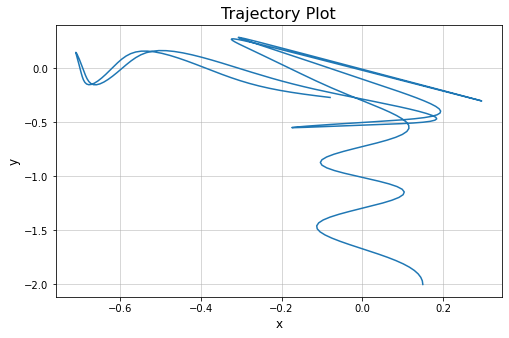

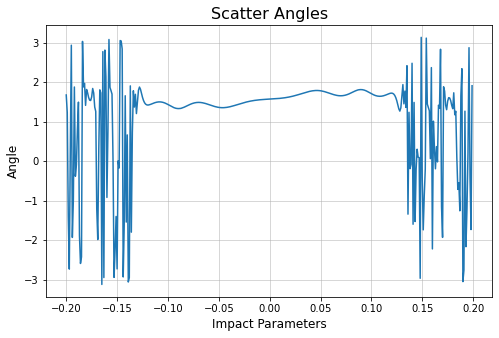

In [1]:
# Solution to part (a)
# YOUR CODE HERE
from math import atan2
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt



def potentialODE(t, r):
    '''
    Parameters
    ----------
    t : not needed but used in solve_ivp
    r : impact parameters
    Returns
    -------
    retVal : coupled ODE's
    '''
    x0 = r[0]
    vx = r[1]
    y0 = r[2]
    vy = r[3]
    f_x = - 2 * y0 ** 2 * x0 * (1 - (x0 ** 2)) * np.exp(-( x0 ** 2 + y0 ** 2))
    f_y = - 2 * x0 ** 2 * y0 * (1 - (y0 ** 2)) * np.exp(-( x0 ** 2 + y0 ** 2))
    retVal = np.array([vx, f_x, vy, f_y])
    return retVal

def trajectory(impactpar, speed):
    '''
    Parameters
    ----------
    impactpar : impact parameters
    speed : speed of ball
    Returns
    -------
    trajectory of x and y
    '''
    maxtime = 10 / speed
    time = np.linspace(0, maxtime, 300)
    param = np.array([impactpar, 0, -2, speed])
    retVal = solve_ivp(potentialODE, (0, 300), param, t_eval = time)
    return retVal.y[0], retVal.y[2]

speed = 0.1
b = 0.15
xoft, yoft = trajectory(b, speed)

plt.figure(figsize = (8, 5))
plt.title("Trajectory Plot", fontsize = 16)
plt.plot(xoft, yoft)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.grid(linewidth = 0.5)
plt.show()

# Solution to part (b)
# YOUR CODE HERE

def scatterangles(allb, speed):
    '''
    Parameters
    ----------
    allb : impact parameters array
    speed : speed of ball
    Returns
    -------
    array of the scatter angles
    '''
    # set up
    scaAng = []
    maxtime = 10 / speed
    time = np.linspace(0, maxtime, 300)

    for i in range(len(allb)):
        ans = solve_ivp(potentialODE, (0, 300), [allb[i], vx0, y0, speed], t_eval = time)
        xVal = ans.y[1]
        yVal = ans.y[3]
        arcTan = atan2(yVal[-1], xVal[-1])
        scaAng.append(arcTan)
    return np.array(scaAng)


x0 = np.arange(-0.2, 0.2, 0.001)
vx0= 0
y0 = -2
vy = 0.1
plots = scatterangles(x0, vy)

plt.figure(figsize = (8, 5))
plt.title("Scatter Angles", fontsize = 16)
plt.plot(x0, plots)
plt.xlabel("Impact Parameters", fontsize = 12)
plt.ylabel("Angle", fontsize = 12)
plt.grid(linewidth = 0.5)
plt.show()


In [2]:
# Test cell
speed = 0.1
b = 0.15
xoft, yoft = trajectory(b, speed)
assert (xoft[1]>0.145 and xoft[1]<0.149), 'wrong x(t)'
assert (yoft[1]>-1.97 and yoft[1]<-1.96), 'wrong y(t)'

In [3]:
# Test cell
angle = scatterangles(np.array([b]), speed)
assert (angle[0]>-0.42 and angle[0]<-0.4), 'wrong scatter angle'

### Tests 2 marks; Style 1 mark; Plots - 2 marks